In [206]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [207]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [208]:
t_data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")
t_data.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


In [209]:
def remove_stop_words(sir):
    splited = sir.split(' ')
    splited = [word for word in splited if word not in stopwords]
    return ' '.join(splited)

t_data.Review = t_data.Review.apply(remove_stop_words)

In [210]:
sid = SentimentIntensityAnalyzer()

def get_char_count(sir):
    return len(sir)
def get_word_count(sir):
    return len(sir.split(' '))
def get_average_word_length(sir):
    aux = 0
    for word in sir.split(' '):
        aux += len(word)
    return aux/len(sir.split(' '))
def get_pos_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['pos']
def get_neg_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['neg']
def get_neu_sentiment(sir):
    sent = sid.polarity_scores(sir)
    return sent['neu']

In [211]:

t_data['Char_Count'] =  t_data.Review.apply(get_char_count)
t_data['Word_Count'] =  t_data.Review.apply(get_word_count)
t_data['Average_Word_Length'] =  t_data.Review.apply(get_average_word_length)
t_data['Positive_Sentiment'] =   t_data.Review.apply(get_pos_sentiment)
t_data['Negative_Sentiment'] = t_data.Review.apply(get_neg_sentiment)
t_data['Neutral_Sentiment'] =t_data.Review.apply(get_neu_sentiment)

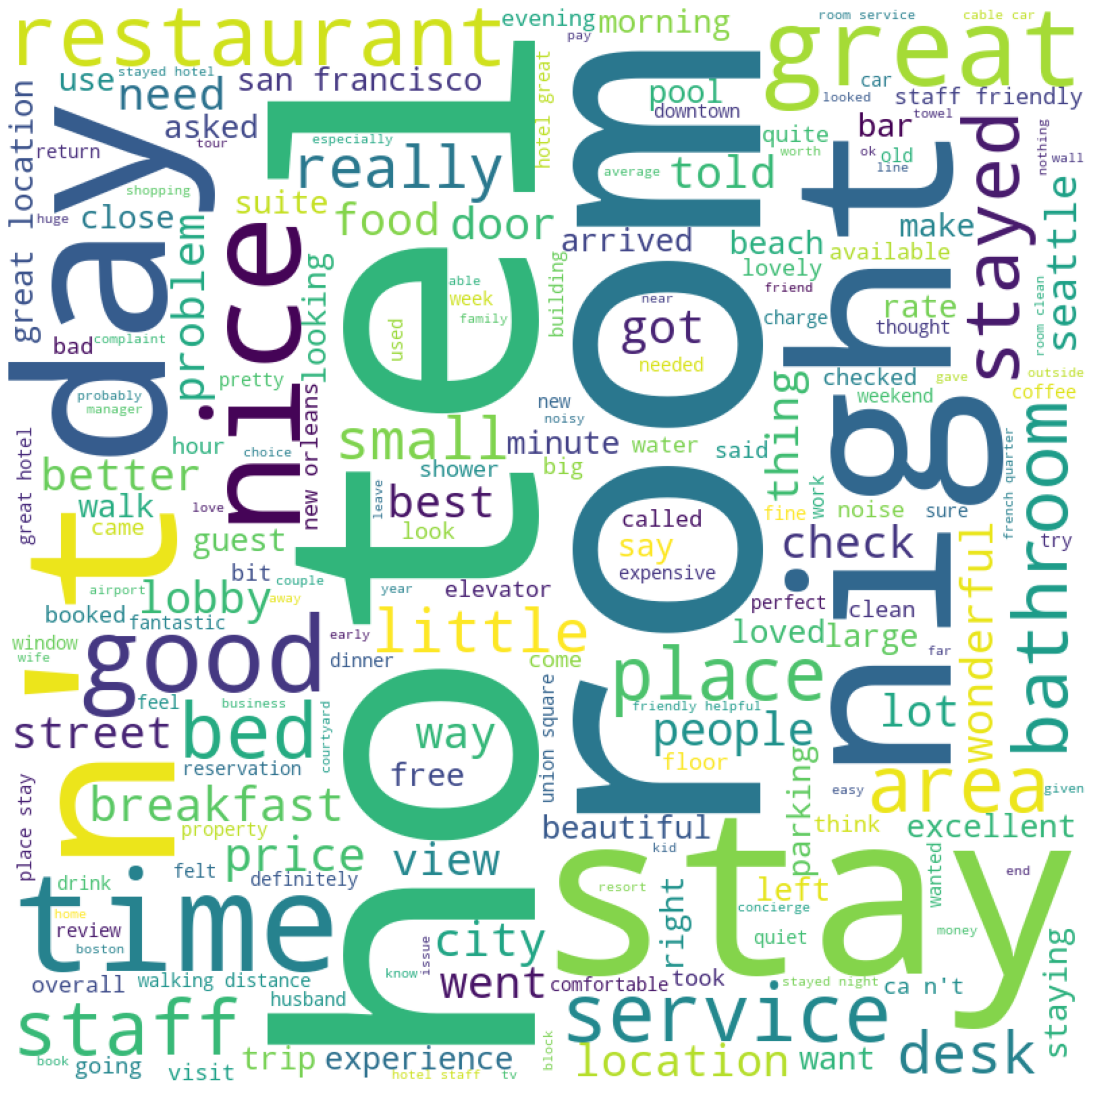

In [212]:
word_list = ''
for word in t_data.Review:
    splited = word.lower()
    word_list +=splited
    
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,min_font_size=5).generate(word_list)
plt.figure(figsize = (25, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [213]:
ex.box(t_data,x='Rating',y='Review',notched=True,title='Rating Positive Sentiment Distributions')

### We see that the higher the average positive sentiment the higher the rating

In [214]:
ex.box(t_data,x='Rating',y='Negative_Sentiment',notched=True,title='Rating Positive Sentiment Distributions')

### And not surprisingly the higher the negative sentiment the lower the rating 

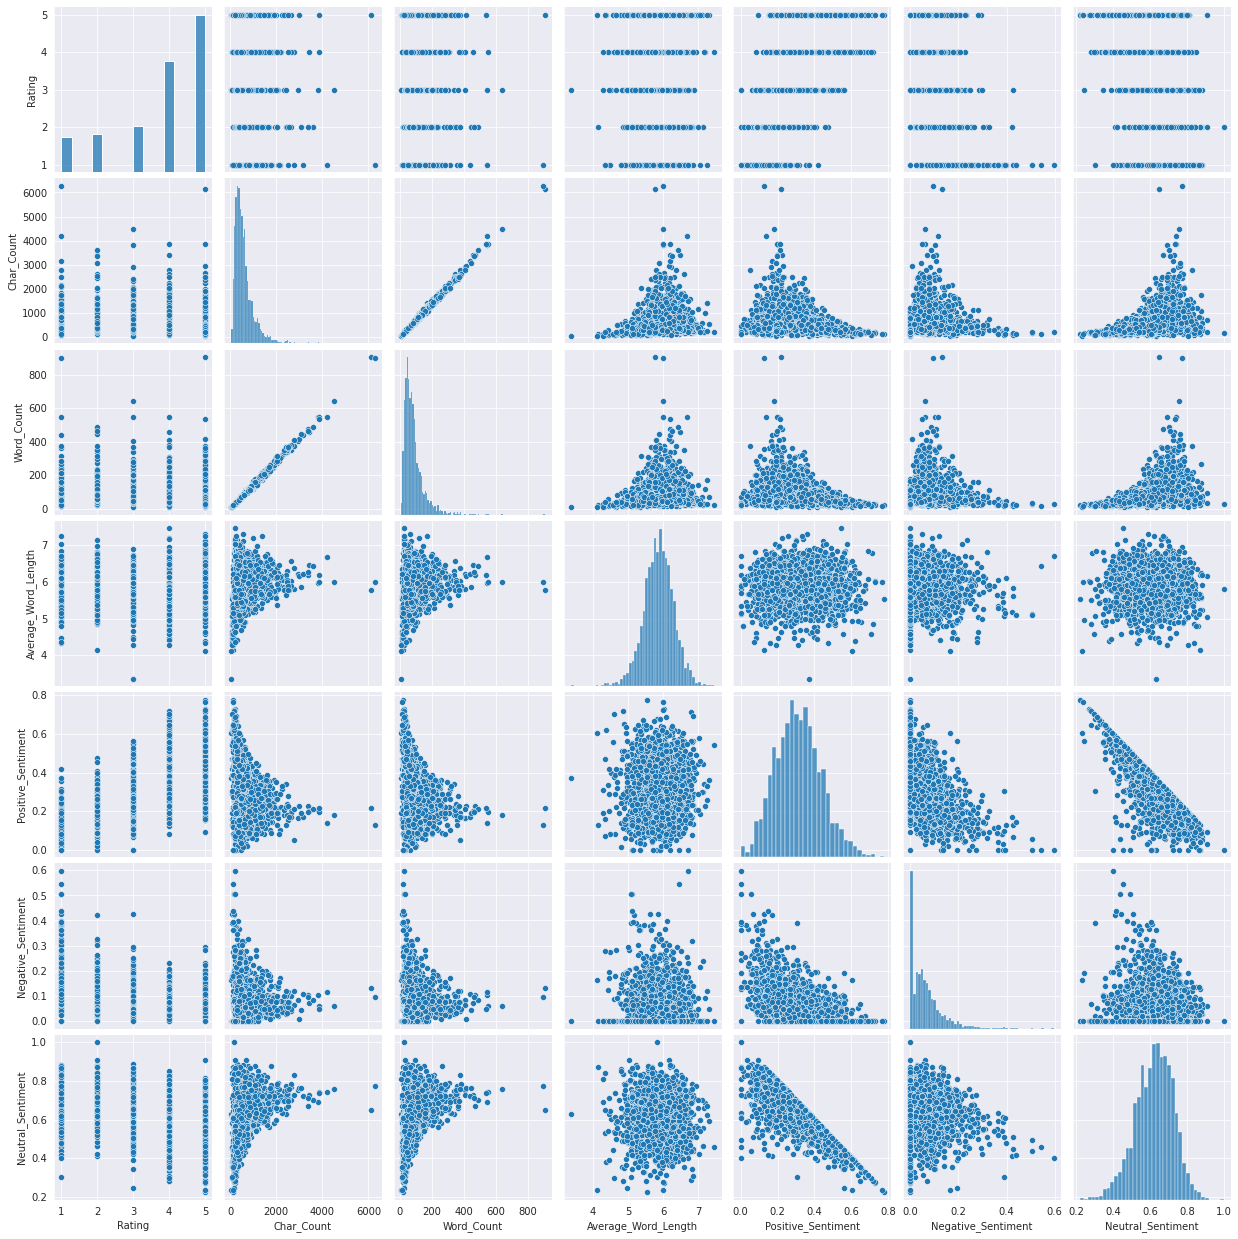

In [215]:
sns.pairplot(t_data)

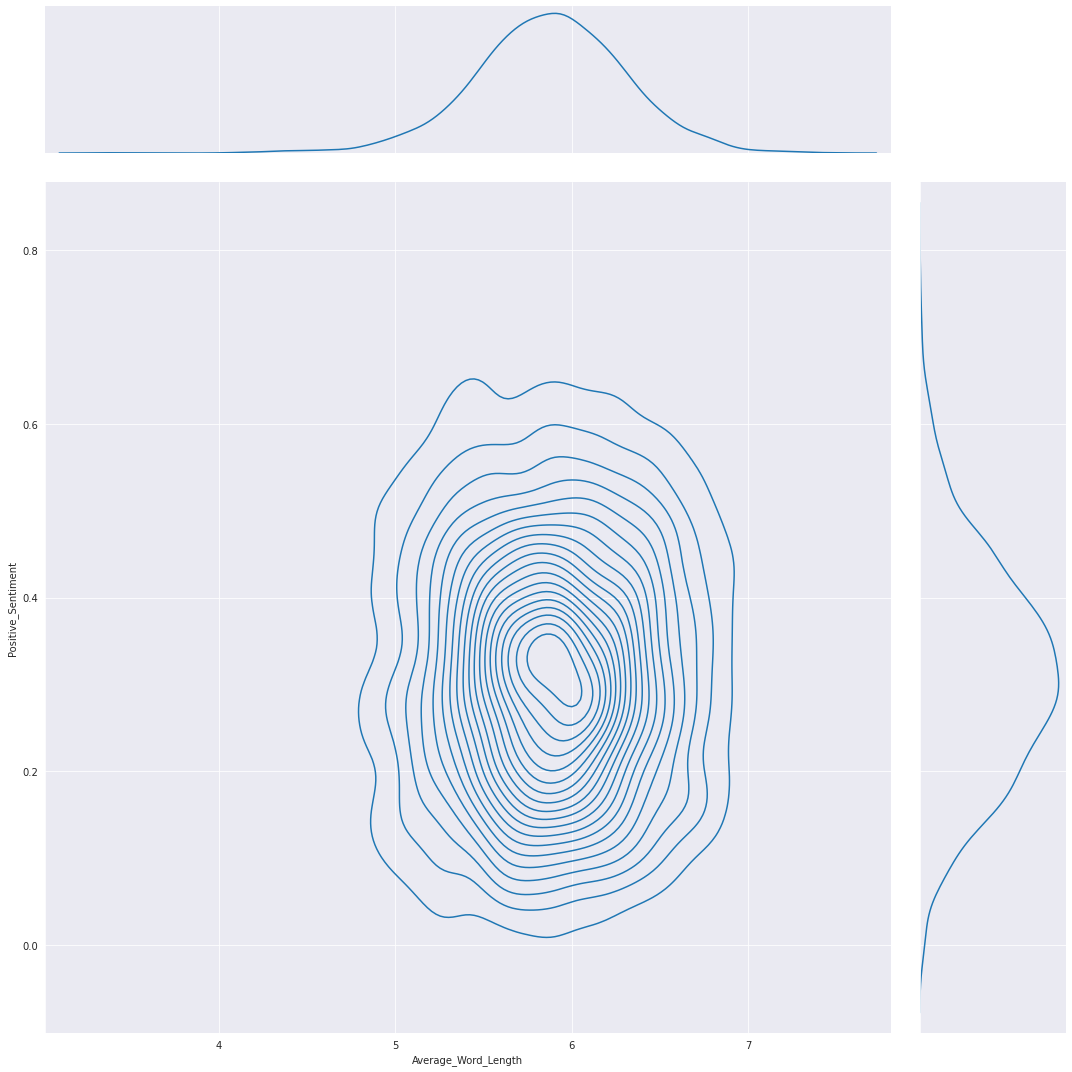

In [216]:
sns.jointplot(x=t_data['Average_Word_Length'],y=t_data['Positive_Sentiment'],height=15,kind='kde',levels=20)

In [217]:
print('Average_Word_Length Skew: ',t_data['Average_Word_Length'].skew(),"  Average_Word_Length Kurtosis",t_data['Average_Word_Length'].kurt())

Average_Word_Length Skew:  -0.26542205683029063   Average_Word_Length Kurtosis 1.0652283990175269


In [218]:
print('Average_Word_Length Mean: ',t_data['Average_Word_Length'].mean(),"  Average_Word_Length Median",t_data['Average_Word_Length'].median(),' Average_Word_Length Mode : ',t_data['Average_Word_Length'].mode()[0])

Average_Word_Length Mean:  5.872879368908855   Average_Word_Length Median 5.882352941176471  Average_Word_Length Mode :  6.0


### The Average_Word_Length Is Approximately Normally Distributed

In [219]:
data_info = t_data.describe()
data_info.loc['skew'] = t_data.skew()
data_info.loc['kurt'] = t_data.kurt()
data_info

,Rating,Char_Count,Word_Count,Average_Word_Length,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment
count,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000
mean,3.817649,609.046466,88.044123,5.872879,0.312846,0.064210,0.622955
std,1.304715,483.594546,68.501369,0.431351,0.124921,0.067731,0.104234
min,1.000000,40.000000,8.000000,3.363636,0.000000,0.000000,0.223000
25%,3.000000,314.000000,46.000000,5.608696,0.225000,0.016000,0.554000
50%,4.000000,488.000000,71.000000,5.882353,0.309000,0.049000,0.630000
75%,5.000000,738.000000,106.000000,6.155556,0.395000,0.090000,0.697000
max,5.000000,6278.000000,905.000000,7.458333,0.777000,0.597000,1.000000
skew,-0.908155,3.447328,3.473311,-0.265422,0.252722,2.100139,-0.360364
kurt,-0.357442,22.628907,23.475275,1.065228,0.001540,7.375679,0.242937


In [220]:
tout_l = t_data.copy()
tout_l['OLL'] = 'Normal'
tout_l.loc[tout_l[tout_l['Word_Count']>1000].index,'OLL']= 'Outlier'
tout_l.loc[tout_l[tout_l['Neutral_Sentiment']<0.25].index,'OLL']= 'Outlier'
tout_l.loc[tout_l[tout_l['Neutral_Sentiment']>0.98].index,'OLL']= 'Outlier'

ex.scatter_3d(tout_l,x='Rating',y='Neutral_Sentiment',z='Word_Count',color='OLL')

### Outlier Removal

In [221]:
t_data = t_data[t_data['Neutral_Sentiment']>0.25]
t_data = t_data[t_data['Neutral_Sentiment']<0.98]
t_data = t_data[t_data['Word_Count']<1000]

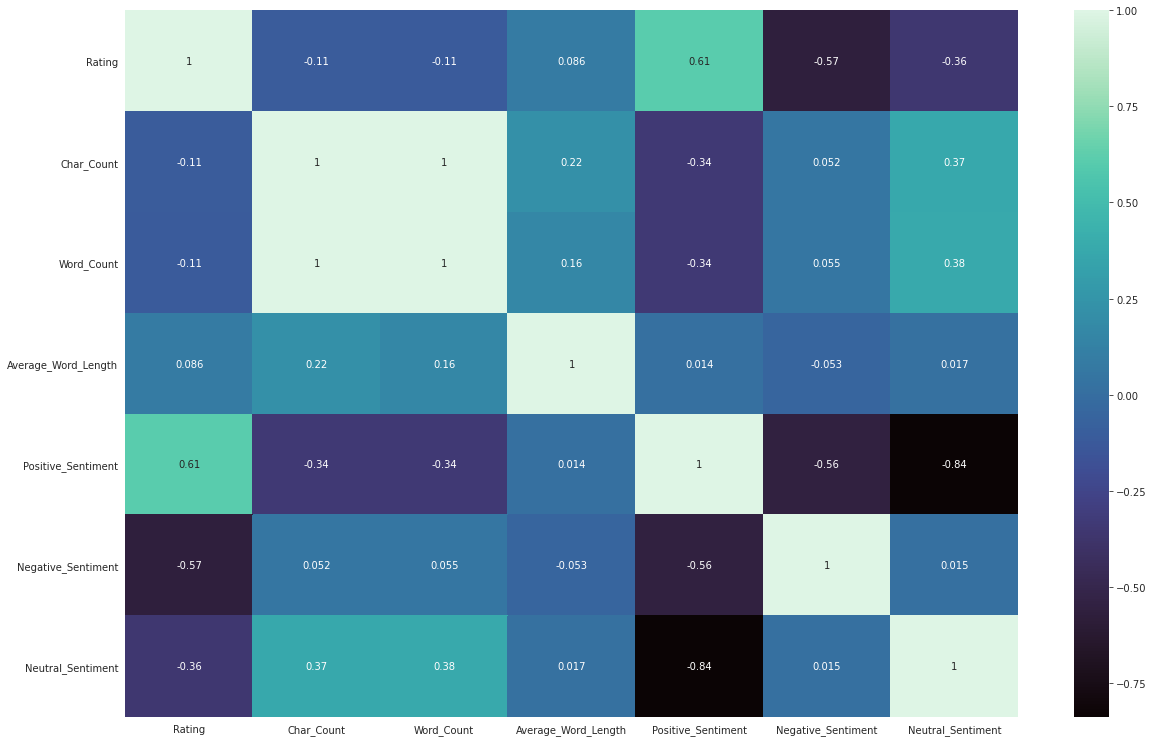

In [222]:
cors = t_data.corr('pearson')
plt.figure(figsize=(20,13))
sns.heatmap(cors,annot=True,cmap='mako')

In [223]:
t_data.head(3)

,Review,Rating,Char_Count,Word_Count,Average_Word_Length,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment
0,nice hotel expensive parking got good deal sta...,4,560,82,5.841463,0.307,0.057,0.636
1,ok nothing special charge diamond member hilto...,2,1633,238,5.865546,0.232,0.054,0.714
2,nice rooms 4* experience hotel monaco seattle ...,3,1408,214,5.584112,0.224,0.074,0.702


# Model Selection And Evaluation

In [224]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 

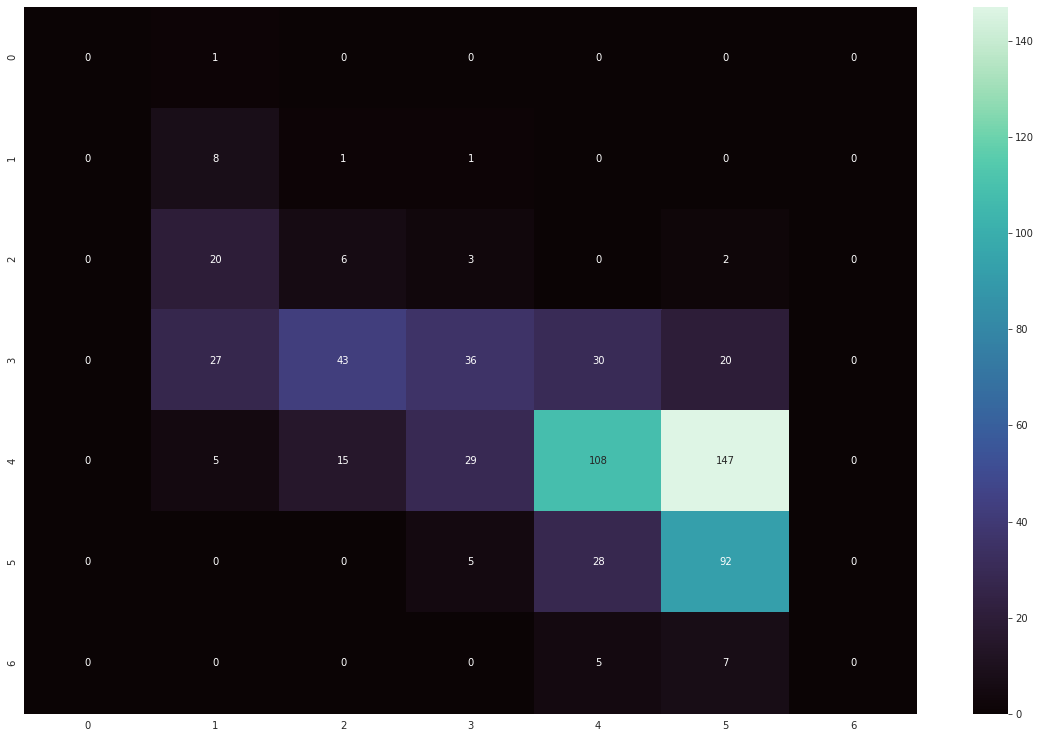

In [225]:



# train_x,test_x,train_y,test_y = train_test_split(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']],t_data['Rating'])
# LR_Pipe = Pipeline(steps=[('model',LinearRegression())])
# LR_Pipe.fit(train_x,train_y)
# LR_predictions= LR_Pipe.predict(test_x)
# LR_predictions = np.round(LR_predictions)
# cfm = confusion_matrix(LR_predictions,test_y)

# plt.figure(figsize=(20,13))
# sns.heatmap(cfm,annot=True,cmap='mako',fmt='d')

In [226]:
# print('accuracy: ',accuracy_score (LR_predictions,test_y))

accuracy:  0.39123630672926446


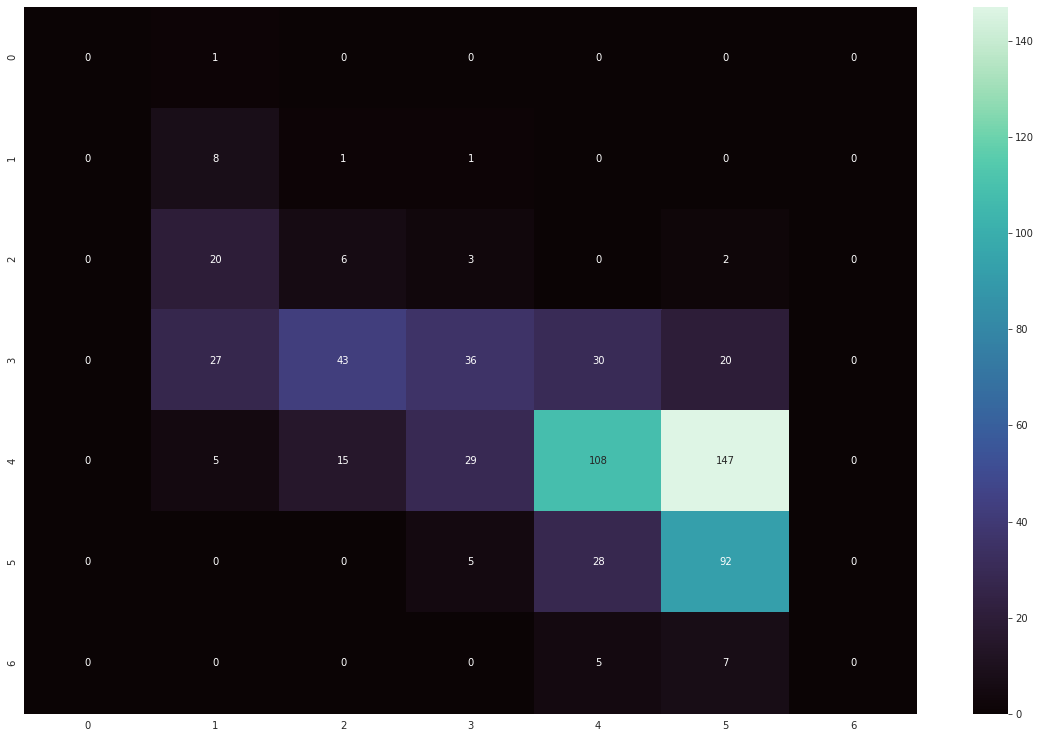

In [227]:
# DT_Pipe = Pipeline(steps=[('model',DecisionTreeRegressor())])
# DT_Pipe.fit(train_x,train_y)
# predictions= DT_Pipe.predict(test_x)
# predictions = np.round(predictions*0.1 + LR_predictions*0.9)
# cfm = confusion_matrix(predictions,test_y)

# plt.figure(figsize=(20,13))
# sns.heatmap(cfm,annot=True,cmap='mako',fmt='d')

In [228]:
# print('accuracy: ',accuracy_score (predictions,test_y))

accuracy:  0.39123630672926446


# Final Rating Prediction Blended Model

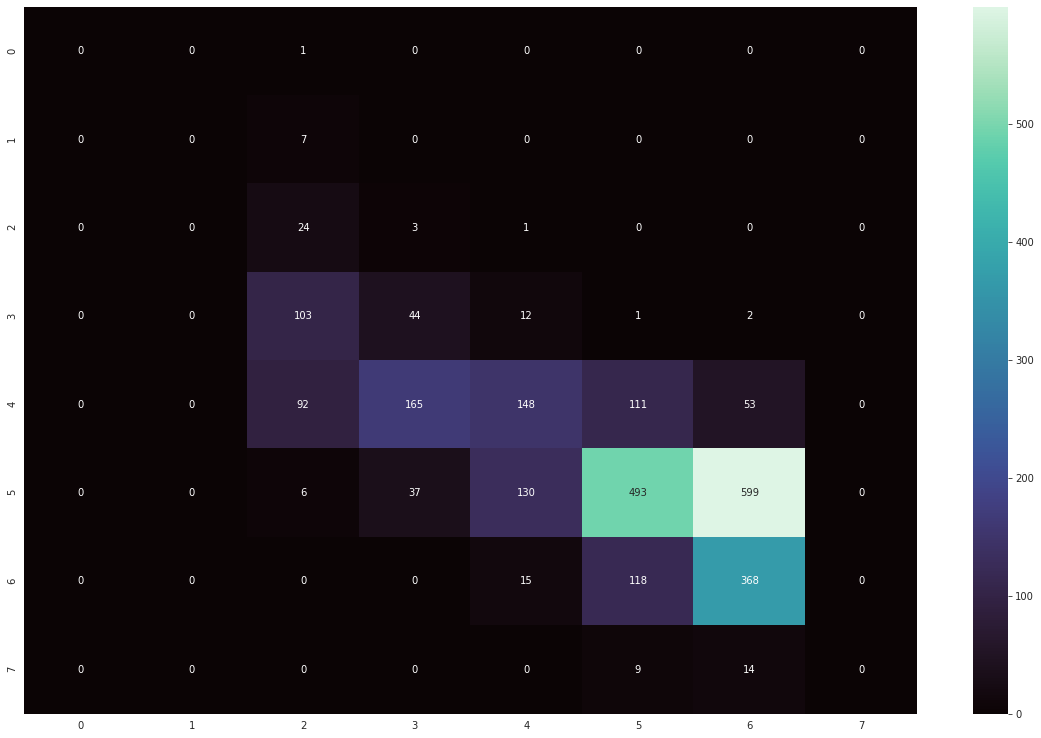

In [229]:
# LR_Pipe.fit(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']],t_data['Rating'])
# DT_Pipe.fit(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']],t_data['Rating'])
# LR_predictions= LR_Pipe.predict(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']])
# RF_predictions= DT_Pipe.predict(t_data[['Positive_Sentiment','Negative_Sentiment','Average_Word_Length']])
# predictions = np.round(LR_predictions*0.9 + RF_predictions*0.1)

# cfm = confusion_matrix(predictions,t_data['Rating'])

# plt.figure(figsize=(20,13))
# sns.heatmap(cfm,annot=True,cmap='mako',fmt='d')

In [230]:
# print('accuracy: ',accuracy_score (predictions,t_data['Rating']))

accuracy:  0.4213615023474178


In [231]:
import numpy as np
from sklearn.model_selection import train_test_split

traindev = t_data[['Review','Rating']].sample(frac=1, random_state=1)
train, dev = train_test_split(traindev, test_size=0.2)



In [232]:
train.to_csv("../content/tripadvisor_hotel_reviews_training.csv", index=False)
dev.to_csv("../content/tripadvisor_hotel_reviews_test.csv", index=False)


In [233]:
!python baselines.py

- Construct the baseline...
	+ Done: 0.0002(s)
- Train the baseline...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] vectorizer__analyzer=word, vectorizer__binary=True, vectorizer__min_df=3, vectorizer__ngram_range=(1, 5) 
[CV]  vectorizer__analyzer=word, vectorizer__binary=True, vectorizer__min_df=3, vectorizer__ngram_range=(1, 5), score=0.524, total=  19.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s
[CV] vectorizer__analyzer=word, vectorizer__binary=True, vectorizer__min_df=3, vectorizer__ngram_range=(1, 5) 
[CV]  vectorizer__analyzer=word, vectorizer__binary=True, vectorizer__min_df=3, vectorizer__ngram_range=(1, 5), score=0.537, total=  19.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.7s remaining:    0.0s
[CV] vectorizer__analyzer=word, vectorizer__binary=True, vectorizer__min_df=3, vectorizer__ngram_range=(1, 5) 
[CV]  vectorizer_

In [247]:
predict("excellent room safe good friendly staff clean best deal beautiful nice location","MLP.pickle")

- Load the model...
	+ Done.
- Inference...
	+ 4 with p=0.7721


(4, 0.7720524520991556)